# Introduction to Machine Learning

### Prepared by: Mehdi Ghane
### Date: Jan, 2020

## Model Evaluation
**The key classification metrics we need to understand are:**
* Accuracy
* Recall
* Precision
* F1-Score

### Accuracy
* #of Correct predictions/Total returns, (True positive + True negative)/Total predicted point.
* Acuuracy is useful when target classes are evenly balanced

### Recall

* It is also known as "**Sensitivity**" and is the ability of model to find all the relevant cases within a dataset.
* It is good for an unbalanced dataset
* The percise definition of recall is the # of true positives divided by the number of true positives plus the number of false negatives. 

### Precision

* Also called as "**Positive predicitve Value**" is the ability of classification model to identify only the relevant data points where they actually are relevant.
* Precision is defined as the # of true positive divided by the # of true positive plus the # of false positive. it is P(True|Positive).

## Classification Error Matrix

### F1-Score
* In cases where we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score.
* It is the harmonic mean of precision and recall taking both metrics into account in the following equation:
$$F_1 = 2*\frac{precision * recall}{precision + recall} $$

* The reason of using harmonic mean instead of arithmetic mean to punish extreme values. For example a perfect precision of 1 and ectremely poor recall of 0, results in 0.5 in arithmetic average but F1 would be 0. 
* In statistics, if the null hypothesis is that all items are irrelevant, absence of type I and type II errors which results in: $$F_1=1$$ (i.e. perfect specificity and sensitivity of 100% each) corresponds respectively to perfect precision (no false positive) and perfect recall (no false negative). 


**Confustion Matrix (Error matrix)**

| Tables   |Positive ,Reject$$H_0$$|Negative ,Fail to reject $$H_0$$|
|----------|:--------:|---------:|
| True	   |	      |   Power  |
| False	   |    α     |     β    |
		
* Precision can be seen as a measure of exactness or quality, whereas recall is a measure of completeness or quantity. The exact relationship between sensitivity and specificity to precision depends on the percent of positive cases in the population.

* In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results

* We need to compromize between the false positive and false negative. In disease diagnostics diagnostic we always prefer to minimize the cost of false negative (Type II error) at the cost of increasing the false positive (Type I error), because we want to classify correctly as many cases of disease as possible.  


**Example**

| n=165   |Predicted: NO|Predicted: YES| Margine  |
|----------|:--------:|---------:|---:|
| Actural: NO	   |	 TN=50 (Power)     |   FP=10 (α )  |60|
| Actual: YES	   |    FN=5 ( β)    |     TP=100   |105|
                          | **Margine** |55|110|
                          
* Accuracy (how often is it correct?): $$\frac{(TP+TN)}{total}=\frac{150}{165}=0.91$$
* Misclassification Rate (Error Rate) or overal, how often is it wrong?: 
$$\frac{(FP+FN)}{total}=\frac{15}{165}=0.09$$

## Regression Error Matrix

### Most common Evaluation Matrix for Regression
* Mean Absolute Error: It does not punish extreme values
* Mean Squared Error: Report the error in a square unit of actual data
* Root Mean Sqaure Error : Does not have the previous methods downside

# Machine Learning With Python

## Linear Regression

In [1]:
conda install scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.family import Model  # a general form to import different models

ModuleNotFoundError: No module named 'sklearn.family'

**To split our data set to train and test**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
x, y=np.arange(10).reshape(5,2) , list(range(5))

In [29]:
x , y

(array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]), [0, 1, 2, 3, 4])

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [31]:
x_train, y_train

(array([[0, 1],
        [4, 5],
        [6, 7]]), [0, 2, 3])

In [32]:
x_test, y_test

(array([[8, 9],
        [2, 3]]), [4, 1])

### Linear Regression

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
os.chdir('/Users/Mehdi/Desktop/Desktop/Data Science/Courses/11.Data Science BootCamp/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression')

In [42]:
df=pd.read_csv('USA_Housing.csv')

In [43]:
df.shape

(5000, 7)

In [44]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [45]:
os.chdir('/Users/Mehdi/Desktop/Desktop/Data Science/Courses/11.Data Science BootCamp/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/Machine Learning')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [47]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


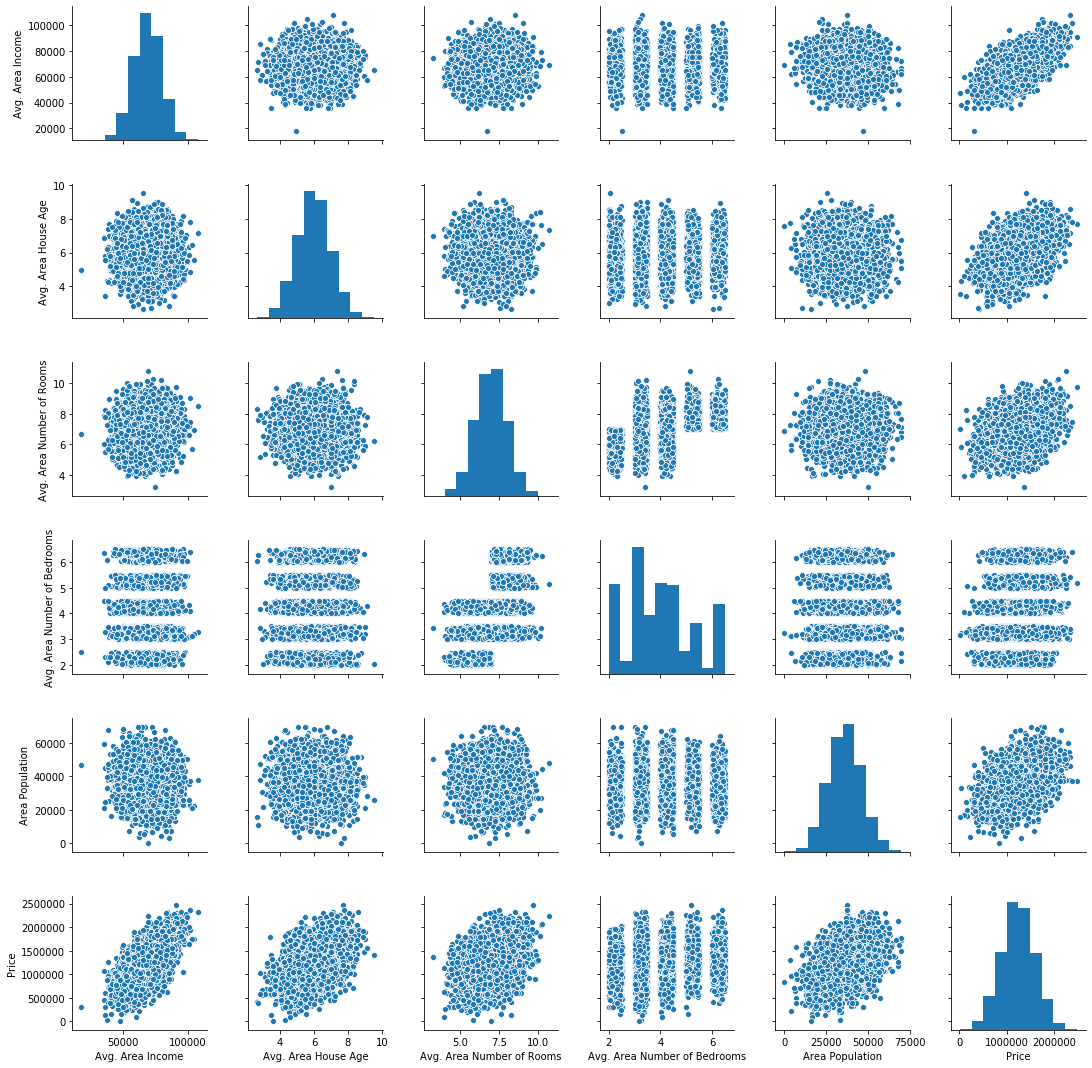

In [48]:
sns.pairplot(df)

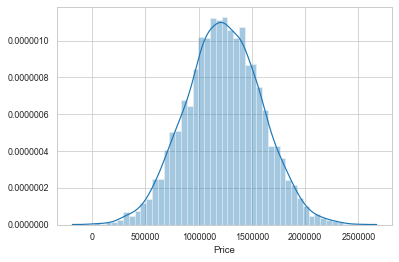

In [48]:
sns.set_context('paper')
sns.set_style('whitegrid')
sns.distplot(df['Price'])

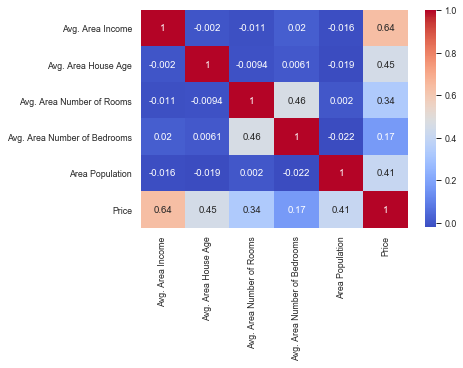

In [57]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True) # to show the correlations

First, we determine labeled and unlabeled variables from the dataset. Since Address is text we donot take it. Later on, we can use NLP which allows us to work with textdata as well.

In [49]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [50]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']] # these are our feature

In [51]:
y=df['Price']

In [3]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=101)
# defining the random_state guarantes to get the same set of test data whenever you run this. 

Next step is to train the data

In [54]:
from sklearn.linear_model import LinearRegression 

In [55]:
lm=LinearRegression()

In [56]:
lm.fit(X_train, y_train) # and this is already applied to object lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lm.intercept_

-2640159.796851911

In [58]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [59]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [60]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [61]:
cdf.index.names=['Features']

In [62]:
cdf

,Coeff
Features,
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### Predictions

In [72]:
predictions=lm.predict(X_test)

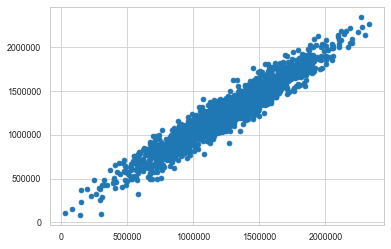

In [73]:
plt.scatter(y_test, predictions)

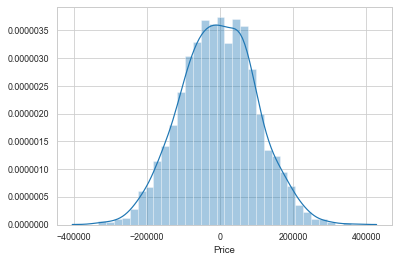

In [74]:
sns.distplot(y_test-predictions)

In [75]:
from sklearn import metrics

In [76]:
metrics.mean_absolute_error(y_test, predictions)

82288.22251914957

In [77]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209507

In [78]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291156

### Working with real Boston Housing dataset

In [4]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [79]:
X=pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [80]:
y=pd.DataFrame(data=boston['target'], columns=['MEDV'])

In [81]:
y.shape, X.shape

((506, 1), (506, 13))

In [5]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression as lr

In [85]:
model=lr()

In [86]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
model.intercept_

array([33.33497576])

In [88]:
model.coef_

array([[-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,
         3.23866812e+00, -1.61698120e+01,  3.90205116e+00,
        -1.28507825e-02, -1.42222430e+00,  2.34853915e-01,
        -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
        -5.47566338e-01]])

In [89]:
cdf=pd.DataFrame(model.coef_.reshape(13,1), X_train.columns, columns=['Coeff'])

In [90]:
cdf

,Coeff
CRIM,-0.128750
ZN,0.037823
INDUS,0.058211
CHAS,3.238668
NOX,-16.169812
RM,3.902051
AGE,-0.012851
DIS,-1.422224
RAD,0.234854
TAX,-0.008213


In [91]:
predict=model.predict(X_test)

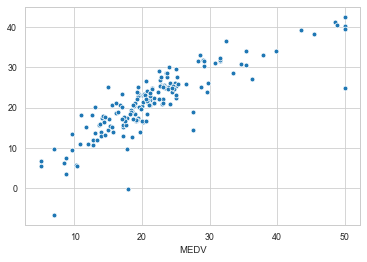

In [116]:
sns.scatterplot(y_test['MEDV'], predict[:,0])

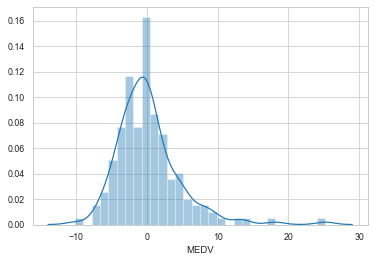

In [118]:
sns.distplot(y_test['MEDV']-predict[:,0], bins=30)

In [119]:
metrics.mean_absolute_error(y_test['MEDV'],predict[:,0])

3.1482557548168217

In [120]:
metrics.mean_squared_error(y_test['MEDV'],predict[:,0])

20.72402343733974

In [121]:
np.sqrt(metrics.mean_squared_error(y_test['MEDV'],predict[:,0]))

4.55236459846306

# Project Exercise

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [9]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
from warnings import filterwarnings 
%matplotlib inline

In [2]:
os.chdir('/Users/Mehdi/Desktop/Desktop/Data Science/Courses/11.Data Science BootCamp/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression')

In [3]:
customers=pd.read_csv('Ecommerce Customers')

In [4]:
os.chdir('/Users/Mehdi/Desktop/Desktop/Data Science/Courses/11.Data Science BootCamp/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/Machine Learning')

In [9]:
customers.shape

(500, 8)

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


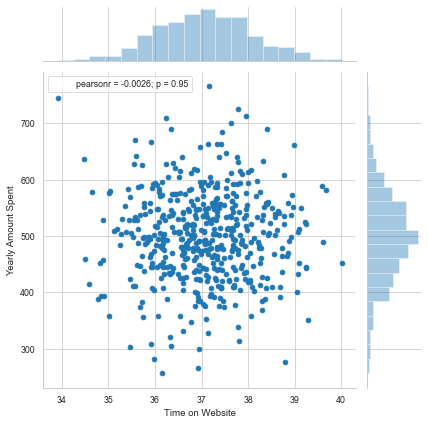

In [23]:
sns.set_context('paper')
sns.set_style('whitegrid')
sns.jointplot(data=customers, 
              x='Time on Website', y='Yearly Amount Spent').annotate(stats.pearsonr)
filterwarnings('ignore')

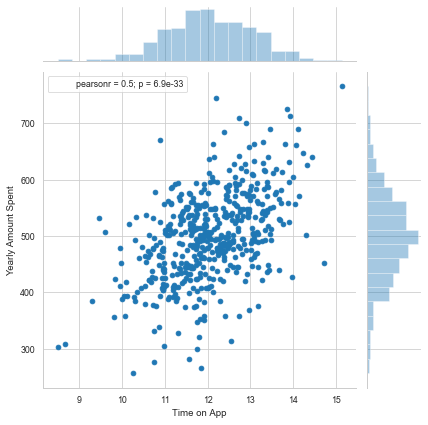

In [24]:
sns.jointplot(data=customers, 
              x='Time on App', y='Yearly Amount Spent').annotate(stats.pearsonr)

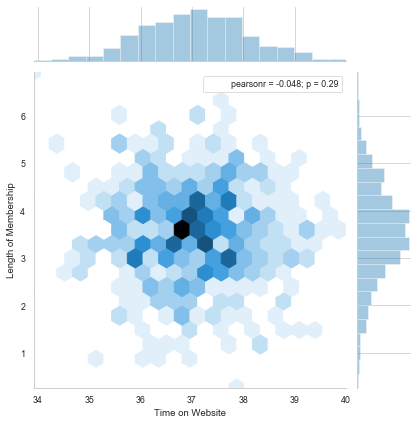

In [28]:
sns.jointplot(data=customers, 
              x='Time on Website', y='Length of Membership',
             kind='hex').annotate(stats.pearsonr)

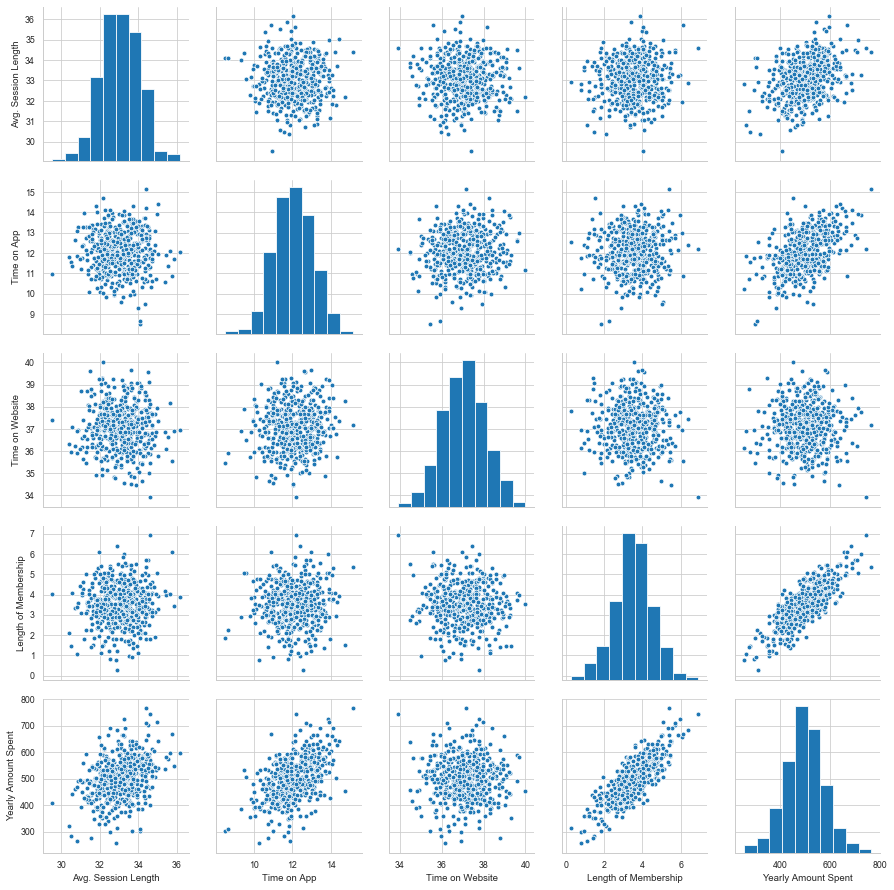

In [29]:
sns.pairplot(customers)

*The most correlated feature with yearly Amount Spent is the Length of Membership*

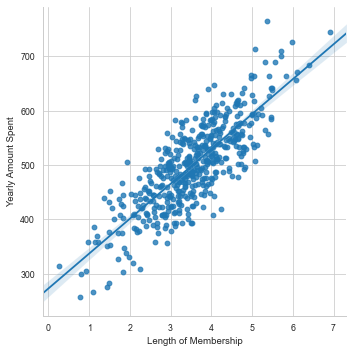

In [31]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent', data=customers)

In [32]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [41]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [34]:
y=customers['Yearly Amount Spent']

In [35]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model.intercept_

-1047.9327822502385

In [47]:
print(model.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [57]:
cfd=pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])

In [58]:
cfd

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [59]:
predict=model.predict(X_test)

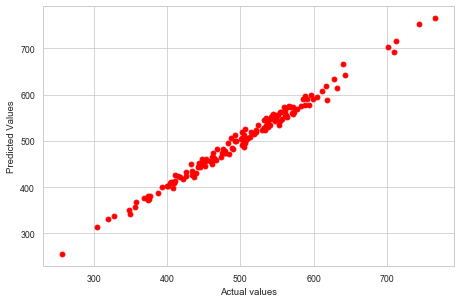

In [126]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.95,0.9])
axes1.set_xlabel("Actual values")
axes1.set_ylabel("Predicted Values")
axes1.plot(y_test, predict,'ro')

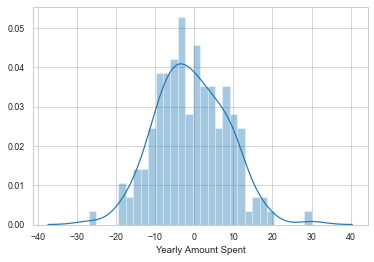

In [82]:
sns.distplot(y_test-predict, bins=30)

In [84]:
from sklearn import metrics

In [91]:
print('MAE: ', metrics.mean_absolute_error(y_test, predict))
print('MSE: ', metrics.mean_squared_error(y_test, predict))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE:  7.228148653430838
MSE:  79.81305165097461
RMSE:  8.933815066978642


In [92]:
cfd

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Conclusion: Since Time on Website has a very low coefficient, and consequently low impact, company should not spend much time on improving Website related improvments**

## Cross Validation and Bias-Variance Trade-Off
* Is the point where we are adding just noise by adding model complexity (flexibility).
* The training error goes down as it has to, but the test error is strting to go up.
* Target must be making balance between Bias and Variance.
* The model after the bias trade-off begins to overfit.
* Read Chapter 2 of statistical learning for more details

## Logestic Regression
* Logestic Regression is a method for classification
* It is applicable to all examples of binary classifications (0 , 1)
* Unlike the name which is confusing, It used to predict discrete categories
* In order to achieve accuracy, we convert linear regression to a logestic regression curve
* The Sigmoid (aka Logestic) Function takes in any value and outputs to between 0 and 1. 
$$S(x) = \frac{1}{1+e^{-x}}$$

* This means we can take our linear regression solution and place it into Sigmond Function
$$S(x) = \frac{1}{1+e^{-(b_0+b_1x)}}$$
* We takes 0.5 as cut-off probability below which will be class 0 and above class 1.

**We use titanic data set to attempt to predict whether or not a passenger survived based off of their features**

In [8]:
import os 
os.chdir('/Users/Mehdi/Desktop/Desktop/Data Science/Courses/11.Data Science BootCamp/Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression')

In [7]:
train=pd.read_csv('titanic_train.csv')

In [8]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


*To see where the majority of null values are*

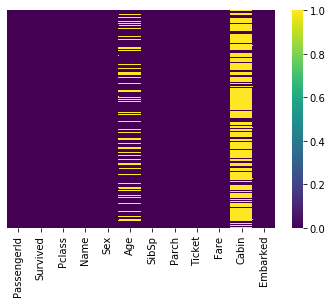

In [17]:
sns.heatmap(train.isnull(), cbar=True, yticklabels=False, cmap='viridis')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*cabin data has alot of missing data, so we can either drop that column or define it as binary 1,0.

In [19]:
sns.set_style('whitegrid')

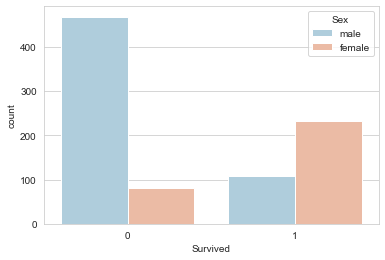

In [26]:
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r')

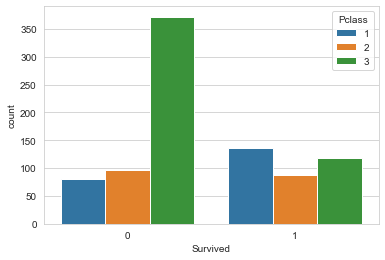

In [31]:
sns.countplot(x='Survived',hue='Pclass', data=train)

In [37]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

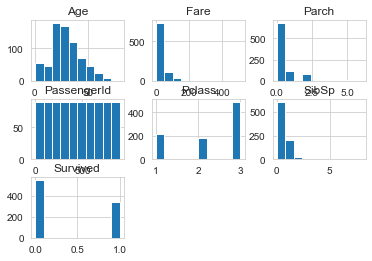

In [39]:
train.hist()
plt.show()

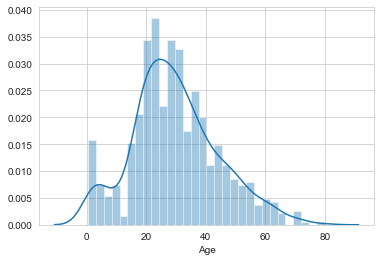

In [42]:
sns.distplot(train['Age'].dropna(), bins=30)

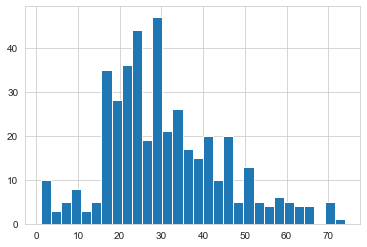

In [50]:
train[train['Survived']==0]['Age'].dropna().hist(bins=30)

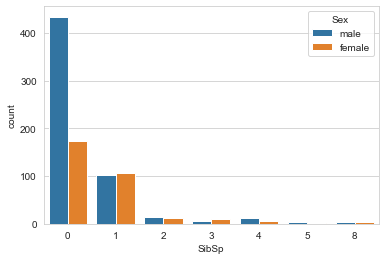

In [75]:
sns.countplot(x='SibSp', data=train, hue='Sex')

*Lots of bachlor were onboard, and those with occampanion were more likely to be couples becuase # of men and Women in that group is the same*

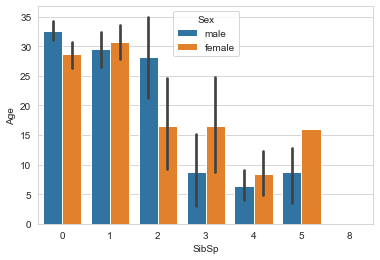

In [96]:
sns.barplot(x='SibSp',y='Age' ,data=train, hue='Sex')

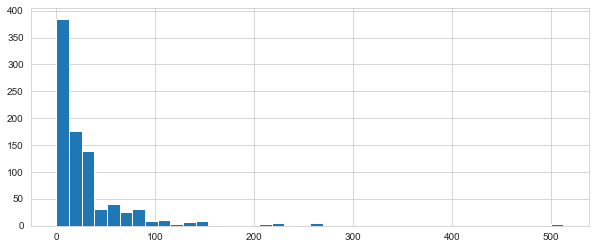

In [56]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [57]:
import cufflinks as cf

In [58]:
cf.go_offline()

In [62]:
train['Fare'].iplot(kind='hist', bins=50)

**Replace Null Values:**
*One approach toward missing values can be filling them with the mean, this is what is called Imputation. We can be more percise by including passenger class*

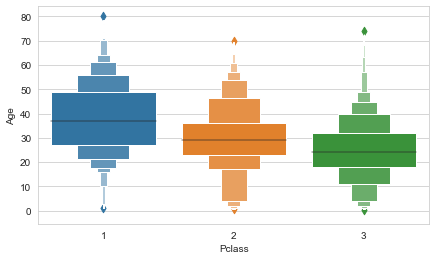

In [101]:
plt.figure(figsize=(7,4))
sns.boxenplot(x='Pclass', y='Age', data=train)

In [102]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: return 38.23
        elif Pclass==2: return 29.877
        else: return 25.14
    else: return Age

In [10]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.drop('Cabin',axis=1, inplace=True)

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


*We still have few missing values in Embarked column*

In [335]:
train.dropna(inplace=True)

*We need to convert the categorical columns to numerical so Machine Learning algorithm could take care of it. We do this by defining dummy variable. In addition, to avoid the problem known as multicollinearity we need to get rid of one output because in the following output, one is simply correlated by the otherone, so no need to keep the both*

In [109]:
pd.get_dummies(train['Sex']).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [12]:
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [292]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
embarked=pd.get_dummies(train['Embarked'], drop_first=True)

In [279]:
embarked.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [14]:
train=pd.concat([train, sex, embarked], axis=1)

In [295]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1


In [87]:
train.drop(['Sex','Embarked','Name', 'Ticket'], axis=1, inplace=True)

In [88]:
train.head(3)# this looks perfect for ML now. expect the passenger Id which is just a repetition of index

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [89]:
train.drop('PassengerId', axis=1, inplace=True)

**Actually we need to Load test data and treat it the same way we did with train data to clean it, but lets treat the train data asif it is the whole dataset.** 

In [90]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel=LogisticRegression()

In [65]:
logmodel.fit(X_train, y_train)

C:\Users\Mehdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
prediction=logmodel.predict(X_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



*To get the pure confusion metrix*

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
print(confusion_matrix(y_test, prediction))

[[149  14]
 [ 36  68]]


Further refinments could be done to improve prediction are:
* Clean test data and use the eintire train data as train
* More feature engineering, grap the title and treat as vriable, cabin letter, also the ticket may have information for you. 
* Reduce dimention of Pclass

In [15]:
pclass=pd.get_dummies(train['Pclass'], drop_first=True)

In [16]:
train=pd.concat([train, pclass], axis=1)

In [17]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


*Try to extract more information*

In [18]:
train['title']=train['Name'].apply(lambda x:x.split('.')[0].strip().split(' ')[-1])

In [19]:
title=pd.get_dummies(train['title'])

In [20]:
train=pd.concat([train,title], axis=1)

In [21]:
train['numtick']=train['Ticket'].apply(lambda x: x.split()[-1])

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 35 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
male           891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
title          891 non-null object
Capt           891 non-null uint8
Col            891 non-null uint8
Countess       891 non-null uint8
Don            891 non-null uint8
Dr             891 non-null uint8
Jonkheer       891 non-null uint8
Lady           891 non-null uint8
Major          891 non-null uint8
Master         891 non-null uint8
Mi

In [23]:
train=train[train['numtick'].apply(lambda x: x.isnumeric())] #remove nonnumeric strings

In [24]:
train['numtick']=pd.to_numeric(train['numtick'])

*Lets run some EDA on data*

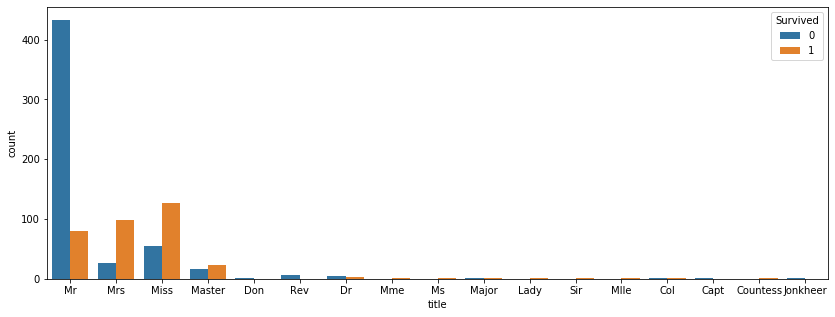

In [443]:
plt.figure(figsize=(14,5))
sns.countplot(x='title', hue='Survived',data=train)

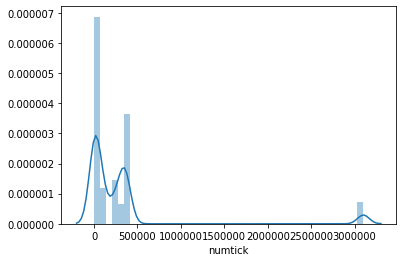

In [452]:
sns.distplot(train['numtick'])

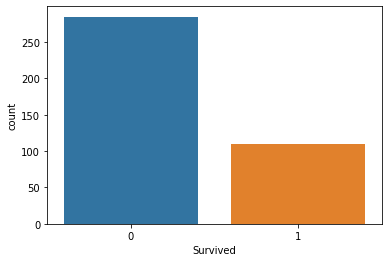

In [469]:
sns.countplot(x='Survived',data=train[train['numtick']>200000])

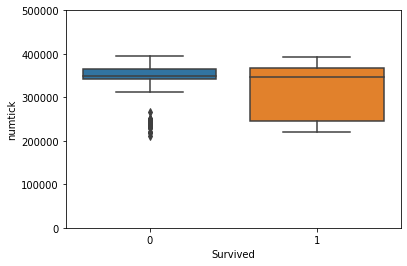

In [26]:
plt.ylim(0, 500000)
sns.boxplot(x='Survived', y='numtick', data=train[train['numtick']>200000])

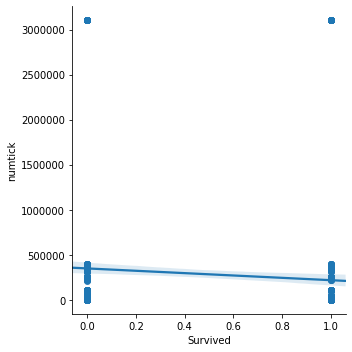

In [25]:
sns.lmplot('Survived', 'numtick', data=train)

In [488]:
train.drop(['Sex','Embarked','Name', 'Ticket','Pclass','PassengerId','title'], axis=1, inplace=True)

In [403]:
train.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,numtick
0,0,22.0,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,21171
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,17599
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,3101282


In [413]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 28 columns):
Survived    885 non-null int64
Age         885 non-null float64
SibSp       885 non-null int64
Parch       885 non-null int64
Fare        885 non-null float64
male        885 non-null uint8
Q           885 non-null uint8
S           885 non-null uint8
2           885 non-null uint8
3           885 non-null uint8
Capt        885 non-null uint8
Col         885 non-null uint8
Countess    885 non-null uint8
Don         885 non-null uint8
Dr          885 non-null uint8
Jonkheer    885 non-null uint8
Lady        885 non-null uint8
Major       885 non-null uint8
Master      885 non-null uint8
Miss        885 non-null uint8
Mlle        885 non-null uint8
Mme         885 non-null uint8
Mr          885 non-null uint8
Mrs         885 non-null uint8
Ms          885 non-null uint8
Rev         885 non-null uint8
Sir         885 non-null uint8
numtick     885 non-null int64
dtypes: float64(2), int

In [475]:
train['tick>200000']=train['numtick']>200000

In [478]:
train['ticktrue']=pd.get_dummies(train['tick>200000'],drop_first=True)

In [479]:
train.drop(['numtick','tick>200000'], axis=1, inplace=True)

In [489]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 28 columns):
Survived    887 non-null int64
Age         887 non-null float64
SibSp       887 non-null int64
Parch       887 non-null int64
Fare        887 non-null float64
male        887 non-null uint8
Q           887 non-null uint8
S           887 non-null uint8
2           887 non-null uint8
3           887 non-null uint8
Capt        887 non-null uint8
Col         887 non-null uint8
Countess    887 non-null uint8
Don         887 non-null uint8
Dr          887 non-null uint8
Jonkheer    887 non-null uint8
Lady        887 non-null uint8
Major       887 non-null uint8
Master      887 non-null uint8
Miss        887 non-null uint8
Mlle        887 non-null uint8
Mme         887 non-null uint8
Mr          887 non-null uint8
Mrs         887 non-null uint8
Ms          887 non-null uint8
Rev         887 non-null uint8
Sir         887 non-null uint8
ticktrue    887 non-null uint8
dtypes: float64(2), int

*Now, we run logestic regression on this new set of data*

In [490]:
y=train['Survived']

In [491]:
X=train.drop(['Survived'], axis=1)

In [492]:
from sklearn.model_selection import train_test_split

In [493]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [495]:
model=LogisticRegression()

In [496]:
model.fit(X_train, y_train)

C:\Users\Mehdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [497]:
prediction=model.predict(X_test)

In [498]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       110

    accuracy                           0.80       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



*Question: Without numtick and it's related fields we get upto 0.86 of F1. numtick shows a good seperation, why get less F1 score when use it for prediction?????*

**Repeat the process with test data. Load Test.csv**

In [399]:
train=pd.read_csv('titanic_train.csv')
X_test=pd.read_csv('titanic_test.csv')
y_test=pd.read_csv('gender_submission.csv')

In [400]:
X_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


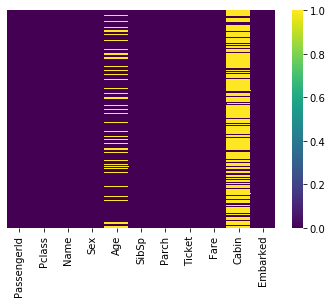

In [401]:
sns.heatmap(X_test.isnull(), yticklabels=False, cmap='viridis')

**Find percentage of missing data**

In [402]:
itr=0
for dataset in [train, X_test]:
  itr=itr+1
  all_missing = dataset.isnull().sum().sort_values(ascending=False)
  percent = round(all_missing/dataset.count().max()*100, 2)
  name=pd.concat([all_missing, percent], axis=1, keys=['Total', '%'])
  if itr==1: 
    missing_train=name
    missing_train.columns = pd.MultiIndex.from_product([missing_train.columns, ['Train']])
    missing_train=missing_train.swaplevel(axis=1)
  else: 
    missing_test=name
    missing_test.columns = pd.MultiIndex.from_product([missing_test.columns, ['Test']])
    missing_test=missing_test.swaplevel(axis=1)
pd.concat([missing_test,missing_train], axis=1, sort=False)

Test        Train       
             Total      % Total      %
Cabin        327.0  78.23   687  77.10
Age           86.0  20.57   177  19.87
Fare           1.0   0.24     0   0.00
Embarked       0.0   0.00     2   0.22
Ticket         0.0   0.00     0   0.00
Parch          0.0   0.00     0   0.00
SibSp          0.0   0.00     0   0.00
Sex            0.0   0.00     0   0.00
Name           0.0   0.00     0   0.00
Pclass         0.0   0.00     0   0.00
PassengerId    0.0   0.00     0   0.00
Survived       NaN    NaN     0   0.00

**Exploratory Analysis**

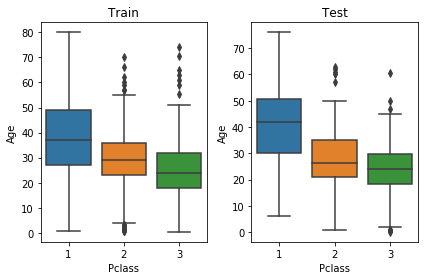

In [403]:
fig, axes=plt.subplots(1,2)
plt.subplot(1,2,1)
axes[0]=sns.boxplot(x='Pclass', y='Age', data=train)
plt.title('Train')
plt.subplot(1,2,2)
plt.title('Test')
sns.boxplot(x='Pclass', y='Age', data=X_test)
plt.tight_layout()

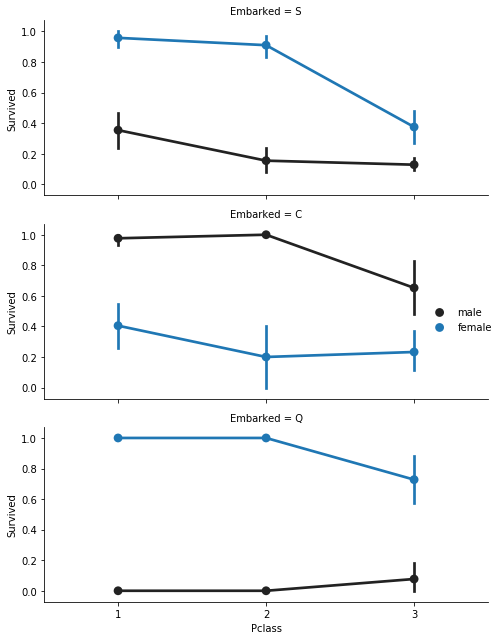

In [404]:
g=sns.FacetGrid(train, row='Embarked', aspect=2, height=3)
g.map(sns.pointplot, 'Pclass','Survived','Sex',order=None, hue_order=None)
g.add_legend()
plt.tight_layout()

In [405]:
X_test.groupby('Pclass').mean()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1098.224299,40.918367,0.476636,0.383178,94.280297
2,1117.935484,28.777500,0.376344,0.344086,22.202104
3,1094.178899,24.027945,0.463303,0.417431,12.459678


In [406]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


**Replace the null value in Age with it's mean per Plcass**

In [407]:
data = [train, X_test]

for dataset in data:
    for i in range(3):
        ave = dataset.groupby('Pclass').mean().iloc[i]['Age']
        dataset.loc[(dataset['Age'].isnull()) & (dataset['Pclass']==i+1), 'Age']=round(ave,3)

**Embarked has 2 null values only, we can either drop those or replace it with most common data**

In [408]:
most=train['Embarked']. value_counts().index[0]

In [409]:
most

'S'

In [410]:
train['Embarked'].fillna(most, inplace=True)
X_test['Embarked'].fillna(most, inplace=True)

In [411]:
train['Embarked'].isnull().sum()

0

In [412]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [413]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Extract titles and convert it to a numeric variable.**

*We import regex for regular expression*

In [414]:
for dataset in [train, X_test]:
    titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5, "Dr":6, "Rev":7}
    dataset['Title']=dataset['Name'].str.extract(', ([a-zA-Z]+)\.', expand=False)
    dataset['Title']=dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title']=dataset['Title'].replace('Ms', 'Miss')
    dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title']=dataset['Title'].replace(['Col','Major','Jonkheer','Lady','Sir','Capt','Dona','Don'], 'Others')
    dataset['Title']=dataset['Title'].map(titles)
train.loc[train['Title'].isnull(), 'Name'] ## there is only a title contous with Nan title
train.loc[train['Title'].isnull(), 'Title']=5

In [415]:
X_test['Title'].isnull().sum()
train['Title'].isnull().sum()

0

**Converting Embarked and Pclass to numeric**

In [416]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in [train, X_test]:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [417]:
itr=0
for dataset in [train, X_test]:
    pclass=pd.get_dummies(dataset['Pclass'], drop_first=True)
    sex=pd.get_dummies(dataset['Sex'], drop_first=True)
    if itr==0:
        train=pd.concat([dataset, pclass, sex],axis=1);
        itr=itr+1;
    else: X_test=pd.concat([dataset, pclass, sex],axis=1)

In [418]:
train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null float64
2              891 non-null uint8
3              891 non-null uint8
male           891 non-null uint8
dtypes: float64(3), int64(6), object(4), uint8(3)
memory usage: 93.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-nu

**Drop extra columns**

In [419]:
for dataset in [train, X_test]:
    dataset.drop(['PassengerId','Sex','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [420]:
X_train=train.drop('Survived', axis=1)
y_train=train['Survived']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [422]:
model=LogisticRegression()

In [429]:
model.fit(X_train, y_train)

C:\Users\Mehdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [430]:
X_test.fillna(0, inplace=True)

In [431]:
predict=model.predict(X_test)

In [434]:
y_test.drop('PassengerId', axis=1, inplace=True)

In [435]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.91      0.94      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.95       418



### Logestic Regression Project 

In [10]:
ad_data=pd.read_csv('advertising.csv')

In [11]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


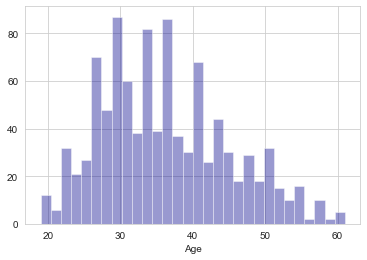

In [154]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'], bins=30,kde=False , label='Age', color='darkblue')

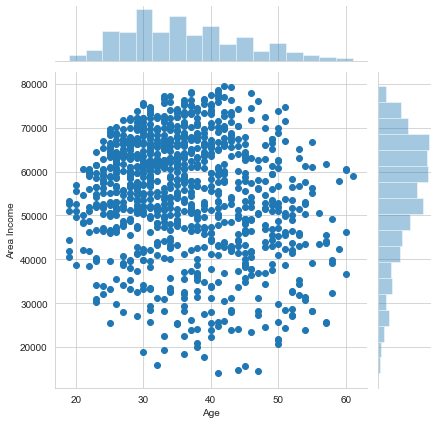

In [26]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

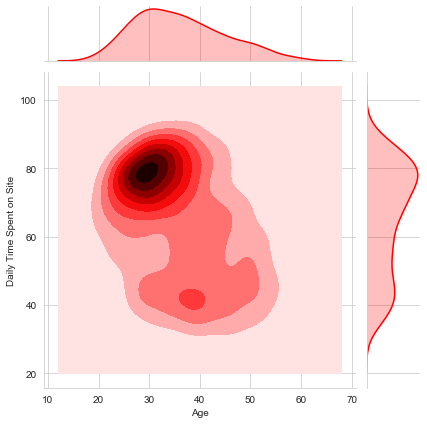

In [32]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

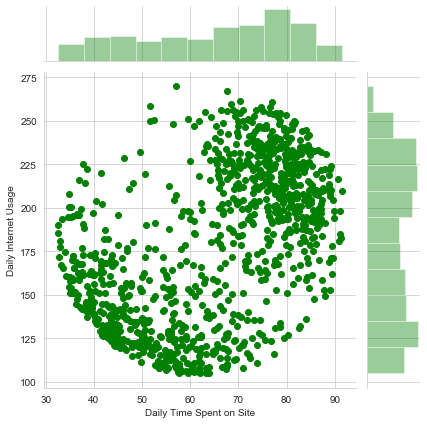

In [36]:
sns.jointplot(y='Daily Internet Usage', x='Daily Time Spent on Site', data=ad_data, color='green')

C:\Users\Mehdi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mehdi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Mehdi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Mehdi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


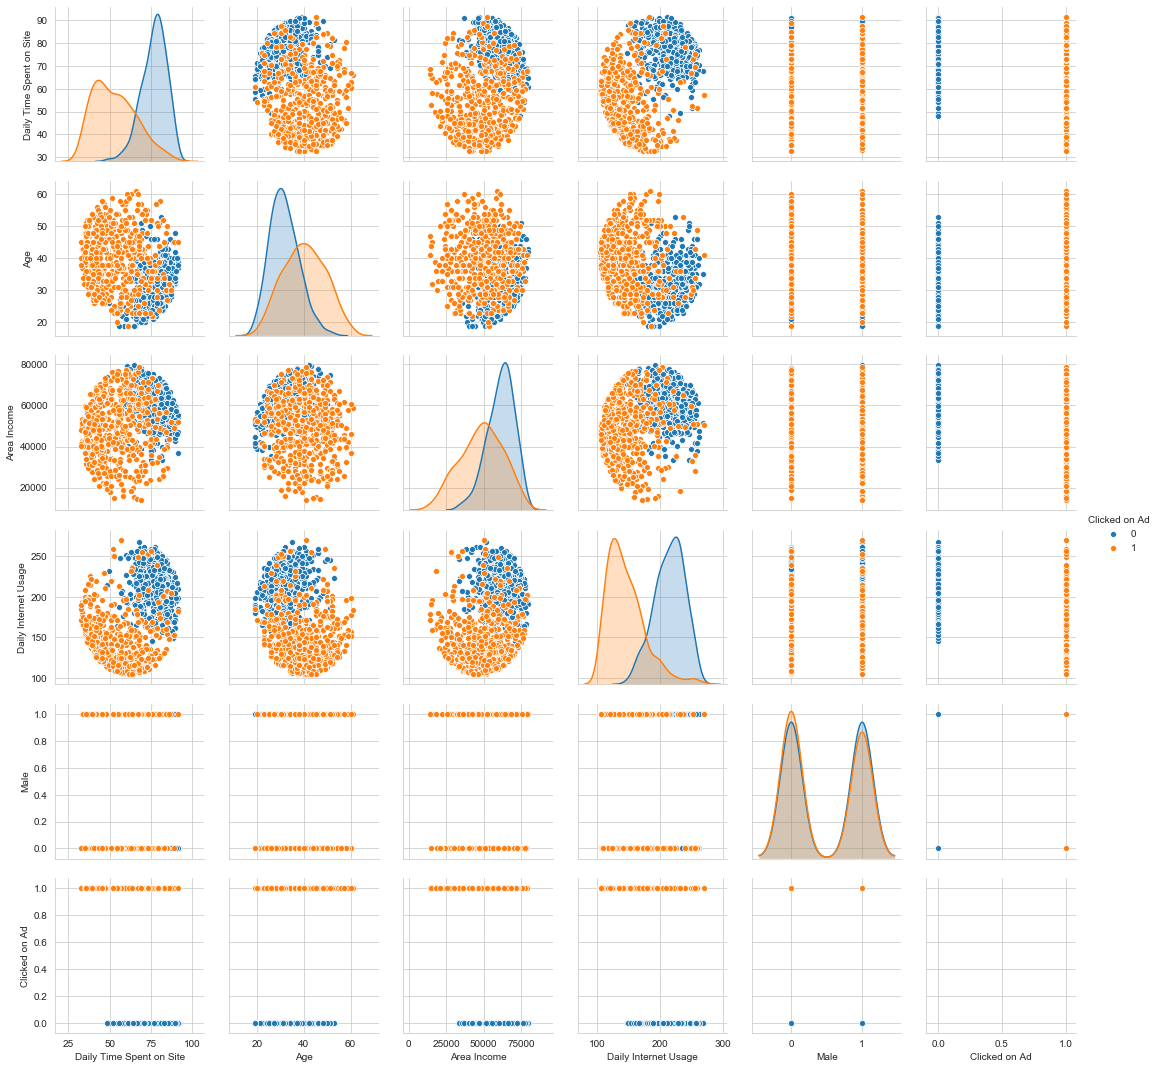

In [39]:
sns.pairplot(ad_data, hue='Clicked on Ad')

In [44]:
ad_data['Country'].value_counts()

Czech Republic    9
France            9
Australia         8
Senegal           8
Peru              8
                 ..
Slovenia          1
Aruba             1
Romania           1
Montserrat        1
Germany           1
Name: Country, Length: 237, dtype: int64

In [105]:
from datetime import datetime as dt

In [118]:
ad_data['Timestamp']=ad_data['Timestamp'].apply( lambda x: dt.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [128]:
ad_data['Day']=ad_data['Timestamp'].apply(lambda x: x.day)
ad_data['Month']=ad_data['Timestamp'].apply(lambda x: x.month)
ad_data['Year']=ad_data['Timestamp'].apply(lambda x: x.year)

In [48]:
import requests

url = 'https://www.worldometers.info/geography/how-many-countries-in-asia/'

r = requests.get(url)

asia = pd.read_html(r.text)

In [75]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [141]:
X=ad_data.drop(['Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad','Timestamp'], axis=1)

In [142]:
y=ad_data['Clicked on Ad']

In [143]:
from sklearn.model_selection import train_test_split


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
lr=LogisticRegression()

In [148]:
lr.fit(X_train,y_train)

C:\Users\Mehdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predict=lr.predict(X_test)

In [155]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [156]:
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[142   4]
 [  8 146]]


## End of Document